In [1]:
# instalação de bibliotecas
!pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 8.0MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=fab9eb8beca76724c0ca15ca4bd3b87e54e67462a51d8ebee407576bfba68aea
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [2]:
rules = ''
for x in range(82):
    rules += (f'regra{x+1}, ')

print(rules)

regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12, regra13, regra14, regra15, regra16, regra17, regra18, regra19, regra20, regra21, regra22, regra23, regra24, regra25, regra26, regra27, regra28, regra29, regra30, regra31, regra32, regra33, regra34, regra35, regra36, regra37, regra38, regra39, regra40, regra41, regra42, regra43, regra44, regra45, regra46, regra47, regra48, regra49, regra50, regra51, regra52, regra53, regra54, regra55, regra56, regra57, regra58, regra59, regra60, regra61, regra62, regra63, regra64, regra65, regra66, regra67, regra68, regra69, regra70, regra71, regra72, regra73, regra74, regra75, regra76, regra77, regra78, regra79, regra80, regra81, regra82, 


simulação 1 :  57.573547751096164
simulação 2 :  56.59877854914203
simulação 3 :  49.00000000000003
simulação 4 :  69.90591087136875
Antecedent: VehiclesPerMilHabitant [745, 374, 625, 290.79]
Antecedent: HabitantsPerBus [1399.51, 1338.5, 3974.37, 4099.33]
Antecedent: WaitTime [54, 55, 62, 40]
Consequent: QualityOfService


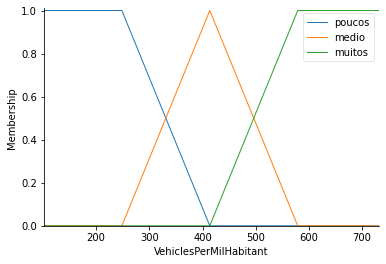

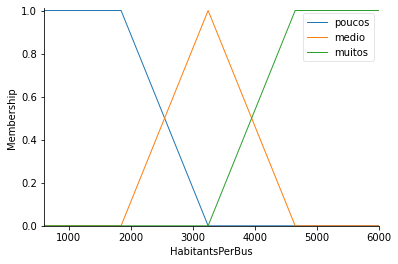

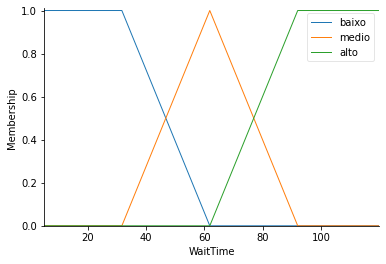

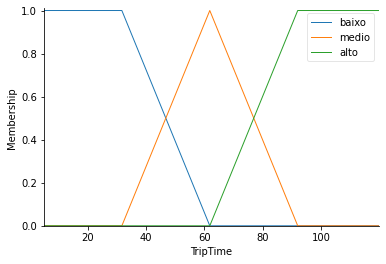

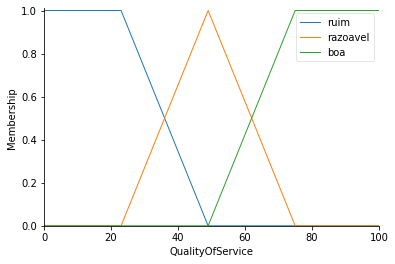

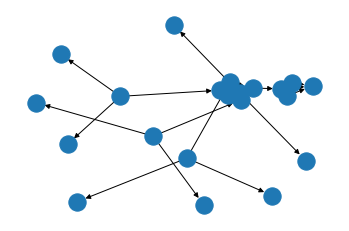

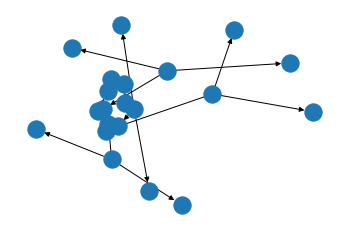

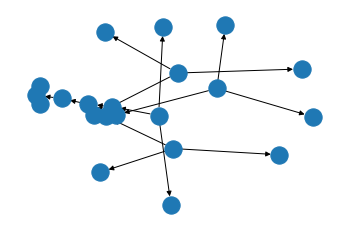

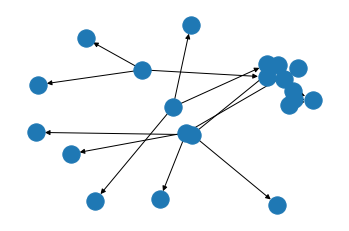

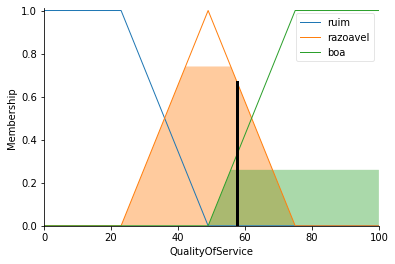

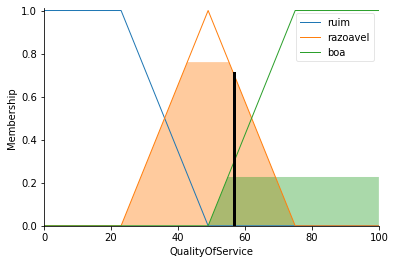

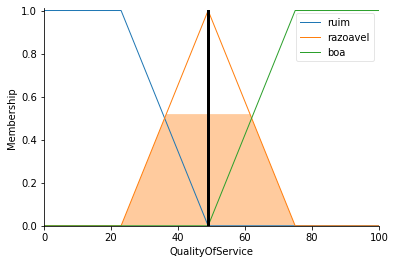

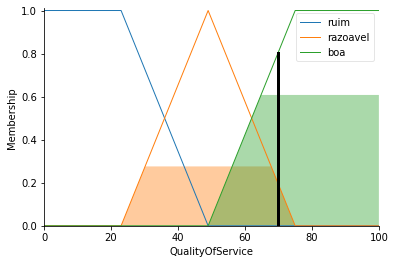

In [5]:
# ==================================================================
# Universidade Estadual de Feira de Santana
# Mestrado em Ciência da Computação
# Disciplina: PGCC015 - Inteligência Computacional
# Professor: Matheus Giovanni Pires
# Aluno: Noberto Pires Maciel
# Atividade final - 14/12/2020
# Métricas de qualidade para o sistema de transporte público urbano
# para a perspectiva do passageiro através de dados gerais
# ==================================================================

# questions:
# Quais dados dos sistemas utilizar para aferir a qualidade do transporte para o passageiro?
# Todos os dados são definidos diariamente com base nos veículos que entram e saem

# Veículos por habitante
# Número de linhas por bairro
# Número de horários por linha
# Tempo de espera por ponto de embarque e desembarque

    #Leitura dos atributos  do dataset no espaço (range)
    # attribute VehiclesPerMilHabitant real [102, 738]
    # attribute HabitantsPerBus real [600, 6000]
    # attribute WaitTime real [5, 120] minutes

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl, interp_membership, interp_universe, defuzz


# 100 pontos de discretização para todos os universos abaixo
x_VehiclesPerMilHabitant = np.arange(102, 738, 6.36)
x_HabitantsPerBus = np.arange(600, 6054, 54)
x_WaitTime  = np.arange(5, 121, 1.16)
x_TripTime  = np.arange(5, 121, 1.16)
x_QualityOfService  = np.arange(0, 101, 1)

VehiclesPerMilHabitant = ctrl.Antecedent(x_VehiclesPerMilHabitant, 'VehiclesPerMilHabitant')
HabitantsPerBus = ctrl.Antecedent(x_HabitantsPerBus, 'HabitantsPerBus')
WaitTime = ctrl.Antecedent(x_WaitTime, 'WaitTime')
TripTime = ctrl.Antecedent(x_TripTime, 'TripTime')
QualityOfService = ctrl.Consequent(x_QualityOfService, 'QualityOfService')

VehiclesPerMilHabitant['poucos'] = fuzz.trapmf(VehiclesPerMilHabitant.universe, [102, 102, 248.28, 413.64])
VehiclesPerMilHabitant['medio'] = fuzz.trimf(VehiclesPerMilHabitant.universe,  [248.28, 413.64, 579])
VehiclesPerMilHabitant['muitos'] = fuzz.trapmf(VehiclesPerMilHabitant.universe, [413.64, 579, 738, 738])

HabitantsPerBus['poucos'] = fuzz.trapmf(HabitantsPerBus.universe,  [600, 600, 1842, 3246])
HabitantsPerBus['medio'] = fuzz.trimf(HabitantsPerBus.universe,  [1842, 3246, 4650])
HabitantsPerBus['muitos'] = fuzz.trapmf(HabitantsPerBus.universe,  [3246, 4650, 6000, 6000])

WaitTime['baixo'] = fuzz.trapmf(WaitTime.universe,  [5, 5, 31.68, 61.84])
WaitTime['medio'] = fuzz.trimf(WaitTime.universe, [31.68, 61.84, 92])
WaitTime['alto'] = fuzz.trapmf(WaitTime.universe,  [61.84, 92, 121, 121])

TripTime['baixo'] = fuzz.trapmf(TripTime.universe,  [5, 5, 31.68, 61.84])
TripTime['medio'] = fuzz.trimf(TripTime.universe, [31.68, 61.84, 92])
TripTime['alto'] = fuzz.trapmf(TripTime.universe,  [61.84, 92, 121, 121])

QualityOfService['ruim'] = fuzz.trapmf(QualityOfService.universe,  [0, 0, 23, 49])
QualityOfService['razoavel'] = fuzz.trimf(QualityOfService.universe, [23, 49, 75])
QualityOfService['boa'] = fuzz.trapmf(QualityOfService.universe,  [49, 75, 100, 100])

QualityOfService.defuzzify_method = 'centroid'
QualityOfService.accumulation_method = max

VehiclesPerMilHabitant.view()
HabitantsPerBus.view()
WaitTime.view()
TripTime.view()
QualityOfService.view()

# regras
regra1 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['poucos'] & WaitTime['alto'] & TripTime['alto'],QualityOfService['ruim'])
regra2 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['poucos'] & WaitTime['alto'] & TripTime['alto'],QualityOfService['ruim'])
regra3 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['poucos'] & WaitTime['alto'] & TripTime['alto'],QualityOfService['ruim'])
regra4 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['medio'] & WaitTime['alto'] & TripTime['alto'],QualityOfService['ruim'])
regra5 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['medio'] & WaitTime['alto'] & TripTime['alto'],QualityOfService['ruim'])
regra6 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['medio'] & WaitTime['alto'] & TripTime['alto'],QualityOfService['ruim'])
regra7 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['muitos'] & WaitTime['alto'] & TripTime['alto'],QualityOfService['ruim'])
regra8 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['muitos'] & WaitTime['alto'] & TripTime['alto'],QualityOfService['ruim'])
regra9 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['muitos'] & WaitTime['alto'] & TripTime['alto'],QualityOfService['ruim'])
regra10 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['poucos'] & WaitTime['medio'] & TripTime['alto'],QualityOfService['razoavel'])
regra11 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['poucos'] & WaitTime['medio'] & TripTime['alto'],QualityOfService['razoavel'])
regra12 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['poucos'] & WaitTime['medio'] & TripTime['alto'],QualityOfService['razoavel'])
regra13 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['medio'] & WaitTime['medio'] & TripTime['alto'],QualityOfService['razoavel'])
regra14 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['medio'] & WaitTime['medio'] & TripTime['alto'],QualityOfService['razoavel'])
regra15 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['medio'] & WaitTime['medio'] & TripTime['alto'],QualityOfService['razoavel'])
regra16 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['muitos'] & WaitTime['medio'] & TripTime['alto'],QualityOfService['razoavel'])
regra17 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['muitos'] & WaitTime['medio'] & TripTime['alto'],QualityOfService['razoavel'])
regra18 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['muitos'] & WaitTime['medio'] & TripTime['alto'],QualityOfService['razoavel'])
regra19 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['poucos'] & WaitTime['baixo'] & TripTime['alto'],QualityOfService['boa'])
regra20 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['poucos'] & WaitTime['baixo'] & TripTime['alto'],QualityOfService['boa'])
regra21 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['poucos'] & WaitTime['baixo'] & TripTime['alto'],QualityOfService['boa'])
regra22 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['medio'] & WaitTime['baixo'] & TripTime['alto'],QualityOfService['boa'])
regra23 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['medio'] & WaitTime['baixo'] & TripTime['alto'],QualityOfService['boa'])
regra24 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['medio'] & WaitTime['baixo'] & TripTime['alto'],QualityOfService['boa'])
regra25 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['muitos'] & WaitTime['baixo'] & TripTime['alto'],QualityOfService['boa'])
regra26 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['muitos'] & WaitTime['baixo'] & TripTime['alto'],QualityOfService['boa'])
regra27 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['muitos'] & WaitTime['baixo'] & TripTime['alto'],QualityOfService['boa'])

regra28 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['poucos'] & WaitTime['alto'] & TripTime['medio'],QualityOfService['ruim'])
regra29 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['poucos'] & WaitTime['alto'] & TripTime['medio'],QualityOfService['ruim'])
regra30 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['poucos'] & WaitTime['alto'] & TripTime['medio'],QualityOfService['ruim'])
regra31 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['medio'] & WaitTime['alto'] & TripTime['medio'],QualityOfService['ruim'])
regra32 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['medio'] & WaitTime['alto'] & TripTime['medio'],QualityOfService['ruim'])
regra33 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['medio'] & WaitTime['alto'] & TripTime['medio'],QualityOfService['ruim'])
regra34 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['muitos'] & WaitTime['alto'] & TripTime['medio'],QualityOfService['ruim'])
regra35 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['muitos'] & WaitTime['alto'] & TripTime['medio'],QualityOfService['ruim'])
regra36 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['muitos'] & WaitTime['alto'] & TripTime['medio'],QualityOfService['ruim'])
regra37 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['poucos'] & WaitTime['medio'] & TripTime['medio'],QualityOfService['razoavel'])
regra38 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['poucos'] & WaitTime['medio'] & TripTime['medio'],QualityOfService['razoavel'])
regra39 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['poucos'] & WaitTime['medio'] & TripTime['medio'],QualityOfService['razoavel'])
regra40 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['medio'] & WaitTime['medio'] & TripTime['medio'],QualityOfService['razoavel'])
regra41 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['medio'] & WaitTime['medio'] & TripTime['medio'],QualityOfService['razoavel'])
regra42 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['medio'] & WaitTime['medio'] & TripTime['medio'],QualityOfService['razoavel'])
regra43 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['muitos'] & WaitTime['medio'] & TripTime['medio'],QualityOfService['razoavel'])
regra44 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['muitos'] & WaitTime['medio'] & TripTime['medio'],QualityOfService['razoavel'])
regra45 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['muitos'] & WaitTime['medio'] & TripTime['medio'],QualityOfService['razoavel'])
regra46 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['poucos'] & WaitTime['baixo'] & TripTime['medio'],QualityOfService['boa'])
regra47 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['poucos'] & WaitTime['baixo'] & TripTime['medio'],QualityOfService['boa'])
regra48 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['poucos'] & WaitTime['baixo'] & TripTime['medio'],QualityOfService['boa'])
regra49 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['medio'] & WaitTime['baixo'] & TripTime['medio'],QualityOfService['boa'])
regra50 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['medio'] & WaitTime['baixo'] & TripTime['medio'],QualityOfService['boa'])
regra51 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['medio'] & WaitTime['baixo'] & TripTime['medio'],QualityOfService['boa'])
regra52 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['muitos'] & WaitTime['baixo'] & TripTime['medio'],QualityOfService['boa'])
regra53 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['muitos'] & WaitTime['baixo'] & TripTime['medio'],QualityOfService['boa'])
regra55 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['muitos'] & WaitTime['baixo'] & TripTime['medio'],QualityOfService['boa'])

regra56 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['poucos'] & WaitTime['alto'] & TripTime['baixo'],QualityOfService['ruim'])
regra57 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['poucos'] & WaitTime['alto'] & TripTime['baixo'],QualityOfService['ruim'])
regra58 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['poucos'] & WaitTime['alto'] & TripTime['baixo'],QualityOfService['ruim'])
regra59 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['medio'] & WaitTime['alto'] & TripTime['baixo'],QualityOfService['ruim'])
regra60 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['medio'] & WaitTime['alto'] & TripTime['baixo'],QualityOfService['ruim'])
regra61 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['medio'] & WaitTime['alto'] & TripTime['baixo'],QualityOfService['ruim'])
regra62 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['muitos'] & WaitTime['alto'] & TripTime['baixo'],QualityOfService['ruim'])
regra63 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['muitos'] & WaitTime['alto'] & TripTime['baixo'],QualityOfService['ruim'])
regra64 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['muitos'] & WaitTime['alto'] & TripTime['baixo'],QualityOfService['ruim'])
regra65 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['poucos'] & WaitTime['medio'] & TripTime['baixo'],QualityOfService['razoavel'])
regra66 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['poucos'] & WaitTime['medio'] & TripTime['baixo'],QualityOfService['razoavel'])
regra67 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['poucos'] & WaitTime['medio'] & TripTime['baixo'],QualityOfService['razoavel'])
regra68 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['medio'] & WaitTime['medio'] & TripTime['baixo'],QualityOfService['razoavel'])
regra69 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['medio'] & WaitTime['medio'] & TripTime['baixo'],QualityOfService['razoavel'])
regra70 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['medio'] & WaitTime['medio'] & TripTime['baixo'],QualityOfService['razoavel'])
regra71 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['muitos'] & WaitTime['medio'] & TripTime['baixo'],QualityOfService['razoavel'])
regra72 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['muitos'] & WaitTime['medio'] & TripTime['baixo'],QualityOfService['razoavel'])
regra73 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['muitos'] & WaitTime['medio'] & TripTime['baixo'],QualityOfService['razoavel'])
regra74 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['poucos'] & WaitTime['baixo'] & TripTime['baixo'],QualityOfService['boa'])
regra75 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['poucos'] & WaitTime['baixo'] & TripTime['baixo'],QualityOfService['boa'])
regra76 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['poucos'] & WaitTime['baixo'] & TripTime['baixo'],QualityOfService['boa'])
regra77 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['medio'] & WaitTime['baixo'] & TripTime['baixo'],QualityOfService['boa'])
regra78 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['medio'] & WaitTime['baixo'] & TripTime['baixo'],QualityOfService['boa'])
regra79 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['medio'] & WaitTime['baixo'] & TripTime['baixo'],QualityOfService['boa'])
regra80 = ctrl.Rule(VehiclesPerMilHabitant['poucos'] & HabitantsPerBus['muitos'] & WaitTime['baixo'] & TripTime['baixo'],QualityOfService['boa'])
regra81 = ctrl.Rule(VehiclesPerMilHabitant['medio'] & HabitantsPerBus['muitos'] & WaitTime['baixo'] & TripTime['baixo'],QualityOfService['boa'])
regra82 = ctrl.Rule(VehiclesPerMilHabitant['muitos'] & HabitantsPerBus['muitos'] & WaitTime['baixo'] & TripTime['baixo'],QualityOfService['boa'])

regra1.view()
regra2.view()
regra80.view()
regra81.view()


quality_ctrl = ctrl.ControlSystem([regra66, regra67, regra68, regra69, regra70, regra71, regra72, regra73, regra74, regra75, regra76, regra77, regra78, regra79, regra80, regra81, regra82, regra82])
quality_sim = ctrl.ControlSystemSimulation(quality_ctrl)


    #@attribute VehiclesPerMilHabitant real [102, 738]
    #@attribute HabitantsPerBus real [600, 6000]
    #@attribute WaitTime real [5, 120] minutes

#dados da Moovit:
#Recife: 25 min
#Brasília: 23 min
#Salvador: 23 min
#Fortaleza: 20 min
#Campinas, SP: 20 min
#Belo Horizonte: 19 min
#Rio de Janeiro: 10 min
#Porto Alegre: 17 min
#São Paulo: 16 min
#Curitiba: 13 min
#simulate = [[745,374,625],[1399.51,1338.5,3974.37],[13,23,16]]

# Curitiba  PR = [[745],[1399.51],[54],[13]]
# Salvador  BA = [[374],[1338.5],[55],[23]]
# São Paulo SP = [[625],[3974.37],[62],[16]]
# Feiar de Santana BA = [[290.79],[2267.39],[40],[15]]

#simulate = [[VehiclesPerMilHabitant],[HabitantsPerBus],[WaitTime]]
simulate = [[745,374,625,290.79],[1399.51,1338.5,3974.37,4099.33],[54,55,62,40],[13,23,16,15]]

for x in range(len(simulate[0])):
  quality_sim.input['VehiclesPerMilHabitant'] = simulate[0][x]
  quality_sim.input['HabitantsPerBus'] = simulate[1][x]
  quality_sim.input['WaitTime'] = simulate[2][x]
  quality_sim.input['TripTime'] = simulate[3][x]
  quality_sim.compute()
  print('simulação',x+1,': ',quality_sim.output['QualityOfService'])
  QualityOfService.view(sim=quality_sim)

print(VehiclesPerMilHabitant,simulate[0])
print(HabitantsPerBus,simulate[1])
print(WaitTime,simulate[2])
print(QualityOfService)
